In [16]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import sounddevice as sd
import itertools
import random
import time
import csv
import datetime

In [17]:
# sounddevice 設定
sd.default.reset()
fs = 44100
sd.default.samplerate = fs
print(sd.query_devices())
sd.default.device = 1

> 0 MacBook Pro Microphone, Core Audio (1 in, 0 out)
< 1 MacBook Pro Speakers, Core Audio (0 in, 2 out)


In [18]:
print(sd.query_devices())

0 MacBook Pro Microphone, Core Audio (1 in, 0 out)
* 1 MacBook Pro Speakers, Core Audio (0 in, 2 out)


$$
s(n) = A\sin(\frac{2\pi f_0n}{f_s})
$$

In [19]:
def play(freq, duration):
    f0 = freq
    sec = duration
    a = 1.0
    phase = np.cumsum(2.0 * np.pi * f0 / fs * np.ones(int(fs * sec)))
    wave = a * np.sin(phase)
    sd.play(wave)
    sd.wait()

In [20]:
# test
play(440,3)

In [21]:
num = 10
f0 = np.linspace(200,2000,num, dtype=int)
f1 = np.arange(-10,10,dtype=int)
exp = tuple(itertools.product(f0,f1))

In [22]:
# random.seed(0)
exp_list = random.choices(exp,k=50)

In [23]:
result = []
duration = 2
for exp in exp_list:
    s1 = exp[0]
    s2 = exp[0] + exp[1]
    #print('Q')
    time.sleep(1.0)
    
    # stimulation 1
    play(s1, duration)
    sd.wait()

    time.sleep(1.0)

    # stimulatio 2
    play(s2, duration)
    sd.wait()

    time.sleep(1.0)

    # answer
    ans = input('同じ音程ですか？ Y / N ?')
    result.append([exp[0],exp[1],ans])

fname = "data_{0}.csv".format(datetime.datetime.now().strftime("%Y_%m%d_%H%M_%S"))

with open(fname,'w') as f:
    writer = csv.writer(f)
    writer.writerows(result)

print('Done.')


Done.


# 分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d1 = pd.read_csv('data_2020_0826_1806.csv', header=None)
# NG : df2 = pd.read_csv('data_2020_0826_1817_27.csv', header=None)
d3 = pd.read_csv('data_2020_0827_1606_43.csv', header=None)
d4 = pd.read_csv('data_2020_0828_1357_41.csv', header=None)
d5 = pd.read_csv('data_2020_0829_1220_53.csv', header=None)
d6 = pd.read_csv('data_2020_0831_1321_00.csv', header=None)
d7 = pd.read_csv('data_2020_0901_0833_52.csv', header=None)
d8 = pd.read_csv('data_2020_0902_0813_27.csv', header=None)
d9 = pd.read_csv('data_2020_0903_0820_22.csv', header=None)
d10 = pd.read_csv('data_2020_0904_0949_58.csv', header=None)
d11 = pd.read_csv('data_2020_0904_1059_33.csv', header=None)
df = pd.concat([d1,d3,d4,d5,d6,d7,d8,d9,d10,d11])
df

,0,1,2
0,2000,-2,n
1,1000,5,n
2,1000,5,n
3,1800,9,n
4,400,8,n
...,...,...,...
45,1200,-7,n
46,1600,-7,n
47,800,-2,y
48,800,-4,n


In [3]:
df.columns = ['f0','diff', 'ans']
df = df.reset_index(drop=True)
df['diff_abs'] = np.abs(df['diff'])

In [4]:
df

,f0,diff,ans,diff_abs
0,2000,-2,n,2
1,1000,5,n,5
2,1000,5,n,5
3,1800,9,n,9
4,400,8,n,8
...,...,...,...,...
495,1200,-7,n,7
496,1600,-7,n,7
497,800,-2,y,2
498,800,-4,n,4


In [5]:
df = pd.pivot_table(df, index='f0',columns='diff_abs',values=['ans'], aggfunc='sum')
df

ans                                                              \
diff_abs      0          1          2           3            4            5    
f0                                                                             
200       yynyyy  ynnnnyyyy    nnnnnnn     nnnnnnn          nnn          nnn   
400          yyy   yyyyynyy          n        nnnn    nnnnnynnn     nnnnnnnn   
600           yy       ynyy  nnnnynnyy  nynnnynynn      nnnnnnn    nnyynnnnn   
800          NaN      nyyyy       nyyy         yny          nnn      nnnnnnn   
1000        yyyy       yyyy       ynyy      nynnyn  yynnnnynnnn   nnnnnnnnnn   
1200          yy       yyyy       yyyy       yyyyn        nnyny          yyn   
1400         NaN    yyyyyyy      yyyyy     ynnynyn         nnny         nnyy   
1600        yyny         ny          y         yyy         ynny          nny   
1800           y         yy      nynyy      ynyyyy           yy  nynyynnyyyy   
2000          yy      yyyyy      nyyyy          yy        yyyyn          nyy   

                                                      
diff_abs      6         7         8         9     10  
f0                                                    
200       nnnnnn     nnnnn  nnnnnnnn    nnnnnn     n  
400       nnnnnn   nnnnnnn    nnnnnn  nnnnnnnn    nn  
600        nnnnn   nnnnnnn   nnnnnnn         n   NaN  
800         nnnn      nnnn      nnnn    nnnnnn  nnnn  
1000        nnnn      nnnn         n       nnn     n  
1200        nnnn    nnnnnn         n       nnn     n  
1400          yy  nnnnnnny     nnnnn     nnnnn   nnn  
1600       ynnnn     nnnnn       nnn  nnnnynnn    nn  
1800       yyyyn     ynnyn     nynnn       nnn  nnnn  
2000         yyy       nyn  nnnyynnn      nyyn   yyy

In [6]:
def func(x):
    if isinstance(x, str):
        n = 0
        for s in x:
            if s == 'n':
                n = n + 1
        return n / len(x)
    

In [7]:
df = df.applymap(func)
df

ans                                                         \
diff_abs        0         1         2         3         4         5    6    
f0                                                                          
200       0.166667  0.444444  1.000000  1.000000  1.000000  1.000000  1.0   
400       0.000000  0.125000  1.000000  1.000000  0.888889  1.000000  1.0   
600       0.000000  0.250000  0.666667  0.700000  1.000000  0.777778  1.0   
800            NaN  0.200000  0.250000  0.333333  1.000000  1.000000  1.0   
1000      0.000000  0.000000  0.250000  0.666667  0.727273  1.000000  1.0   
1200      0.000000  0.000000  0.000000  0.200000  0.600000  0.333333  1.0   
1400           NaN  0.000000  0.000000  0.571429  0.750000  0.500000  0.0   
1600      0.250000  0.500000  0.000000  0.000000  0.500000  0.666667  0.8   
1800      0.000000  0.000000  0.400000  0.166667  0.000000  0.363636  0.2   
2000      0.000000  0.000000  0.200000  0.000000  0.200000  0.333333  0.0   

                                      
diff_abs        7     8      9    10  
f0                                    
200       1.000000  1.00  1.000  1.0  
400       1.000000  1.00  1.000  1.0  
600       1.000000  1.00  1.000  NaN  
800       1.000000  1.00  1.000  1.0  
1000      1.000000  1.00  1.000  1.0  
1200      1.000000  1.00  1.000  1.0  
1400      0.875000  1.00  1.000  1.0  
1600      1.000000  1.00  0.875  1.0  
1800      0.600000  0.80  1.000  1.0  
2000      0.666667  0.75  0.500  0.0

In [8]:
df = df.fillna(0)

In [9]:
df.loc[200]

     diff_abs
ans  0           0.166667
     1           0.444444
     2           1.000000
     3           1.000000
     4           1.000000
     5           1.000000
     6           1.000000
     7           1.000000
     8           1.000000
     9           1.000000
     10          1.000000
Name: 200, dtype: float64

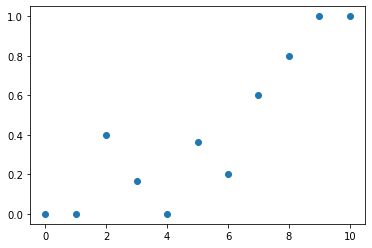

In [10]:
f = 1800
X = np.arange(11)
y = df.loc[f]

plt.scatter(X,y)

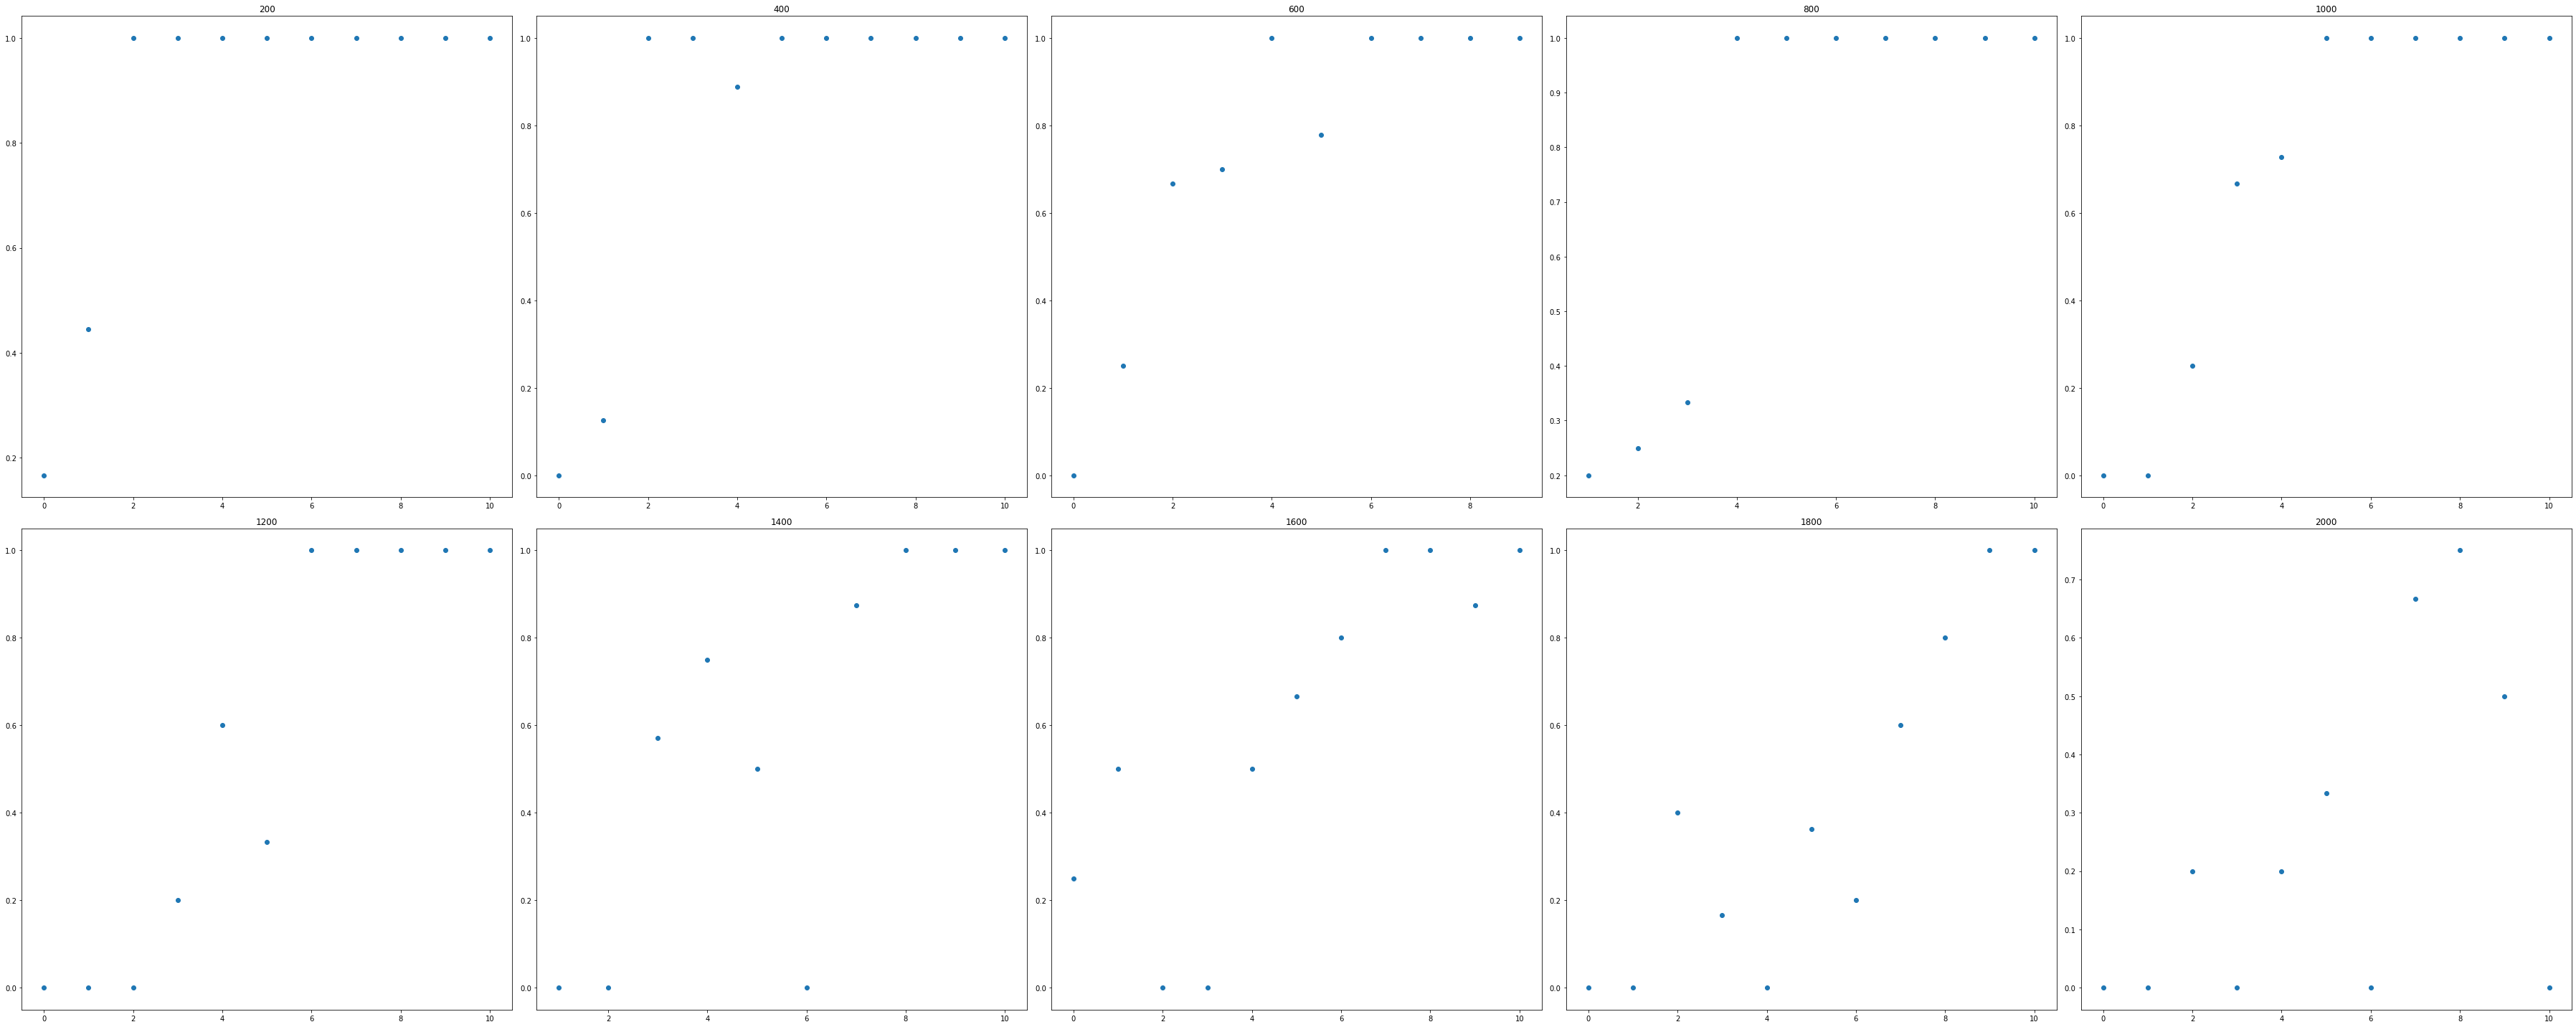

In [144]:
from scipy.optimize import curve_fit

def sigmoid(x, xc, k):
     y = 1 / (1 + np.exp(-k*(x-xc)))
     return y


fig, axes = plt.subplots(2,5, figsize=(50,20))
ax = axes.ravel()

base_freq = df.index.values
X = np.arange(11)


for i in range(10):
    y = df.loc[base_freq[i]]
    ax[i].set_title(str(base_freq[i]))
    ax[i].scatter(X, y)
    param, cov = curve_fit(sigmoid, X, y)
    xfit = np.linspace(0,10)
    ax[i].plot(xfit, sigmoid(xfit, *param))

fig.tight_layout()


$$ y = \frac{a}{1+e^{-k(x-xc)}} $$

In [135]:
X = np.arange(11)
y = df.loc[200]



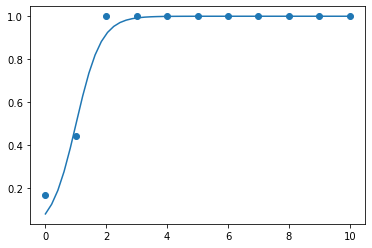

In [136]:
plt.scatter(X,y)


In [18]:
import plotly.io as pio
pio.templates.default = 'simple_white'

In [14]:
from scipy.optimize import curve_fit

def sigmoid(x, xc, k):
     y = 1 / (1 + np.exp(-k*(x-xc)))
     return y

base_freq = df.index.values
X = np.arange(11)

for i in range(10):
     title = '{0}Hz'.format(str(base_freq[i]))

     y = df.loc[base_freq[i]]
     param, cov = curve_fit(sigmoid, X, y)
     xfit = np.linspace(0,10)
     curve = sigmoid(xfit, *param)

     fig = go.Figure()

     fig.add_trace(go.Scatter(
          mode='markers',
          x=X,
          y=y,
          name='p'
     ))

     fig.add_trace(go.Scatter(
          x=xfit,
          y=curve,
          name='curve fit'
     ))

     fig.update_xaxes(title='stimulus')
     fig.update_yaxes(title='p')

     fig.update_layout(
          title=title
     )

     #fig.show()
     f = 'plotly/{0}.png'.format(title)
     fig.write_image(f)



FileNotFoundError: [Errno 2] No such file or directory: 'plotly/200Hz.png'

In [15]:
import plotly.graph_objects as go
import plotly.express as px
from scipy.optimize import curve_fit

In [16]:
def sigmoid(x, xc, k):
     y = 1 / (1 + np.exp(-k*(x-xc)))
     return y

base_freq = df.index.values
X = np.arange(11)

i = 5

y = df.loc[base_freq[i]]
param, cov = curve_fit(sigmoid, X, y)
xfit = np.linspace(0,10)
curve = sigmoid(xfit, *param)


fig = go.Figure()

fig.add_trace(go.Scatter(
    mode='markers',
    x=X,
    y=y,
    name='p'
))

fig.add_trace(go.Scatter(
    x=xfit,
    y=curve,
    name='curve fit'
))

fig.update_xaxes(title='stimulus')
fig.update_yaxes(title='p')

fig.show()

In [32]:
df_plot = pd.DataFrame(y)
df_curve = pd.DataFrame({'x':xfit,'y':curve})

In [36]:
def sigmoid(x, xc, k):
     y = 1 / (1 + np.exp(-k*(x-xc)))
     return y

base_freq = df.index.values
X = np.arange(11)

for i in range(10):
    y = df.loc[base_freq[i]]
    label = str(base_freq[i])
    param, cov = curve_fit(sigmoid, X, y)
    xfit = np.linspace(0,10)
    curve = sigmoid(xfit, *param)
    df_plot = pd.DataFrame(y)
    df_curve = pd.DataFrame({'x':xfit,'y':curve})
    f_plot = 'plot_{0}.csv'.format(label)
    f_curve = 'curve_{0}.csv'.format(label)
    #print(f_plot, f_curve)
    df_plot.to_csv(f_plot)
    df_curve.to_csv(f_curve)
